### Orbit correction

This example shows how to run orbit correction using the simulator or the virtual accelerator.  
If you want to test the virtual accelerator you need to start the container before running the notebook.

In [1]:
import json
import time

import matplotlib.pyplot as plt
import numpy as np

from pyaml.accelerator import Accelerator
from pyaml.tuning_tools.orbit_response_matrix import ConfigModel as ORM_ConfigModel
from pyaml.tuning_tools.orbit_response_matrix import OrbitResponseMatrix

In [2]:
# Load the configuration
# Remember to change the prefix for the live mode to the one matching your virtual accelerator before loading.
sr = Accelerator.load("BESSY2Orbit.yaml")

27 Jan% 2026, 16:57:24 | WARNING | PyAML OA control system binding (0.1.1) initialized with name 'live' and prefix='a3744:'


#### Measure the orbit response matrix

If there is no existing orbit response matrix you need to measure it. This can be done on either the design or live mode.  
It is also possible to measure the ORM using the design mode and use it to correct the live mode.

In [3]:
# Choose which backend to use. 
SR = sr.design
#SR = sr.live

# if the ORM is not present measure it
if sr.design.orbit.response_matrix is None:

    orm = OrbitResponseMatrix(
        cfg=ORM_ConfigModel(
            bpm_array_name="BPM",
            hcorr_array_name="HCorr",
            vcorr_array_name="VCorr",
            corrector_delta=1e-6,
        ),
        element_holder=SR,  # Measurement target
    )
    orm.measure(set_wait_time=0.0 if SR == sr.design else 2.0)
    orm_data = orm.get()

    # Save the data to json
    ORM_data = {
        "type": "pyaml.tuning_tools.response_matrix",
        "matrix": orm_data["matrix"],
        "input_names": orm_data["input_names"],
        "output_names": orm_data["output_names"],
        "inputs_plane": orm_data["inputs_plane"],
        "outputs_plane": orm_data["outputs_plane"],
    }
    json.dump(ORM_data, open("orm.json", "w"))

#### Load the response matrix

The example does the correction for the live mode but it can also be done on the design mode.

In [4]:
# Load the ORM for the live mode
sr.live.orbit.load_response_matrix("orm.json")

In [28]:
# Set orbit for design

std_kick = 100e-6
#corr_d = sr.design.get_magnet("VS3M2D1R")
corr_d = sr.design.get_magnet("HS4M2D1R")
corr_d.strength.set(0)

orbit_d = sr.design.get_bpms("BPM").positions

#### Correct the orbit

In [ ]:
# Set orbit for live

std_kick = 100e-6
corr_l = sr.live.get_magnet("VS3M2D1R")
corr_l.strength.set(std_kick)

orbit_l = sr.live.get_bpms("BPM").positions

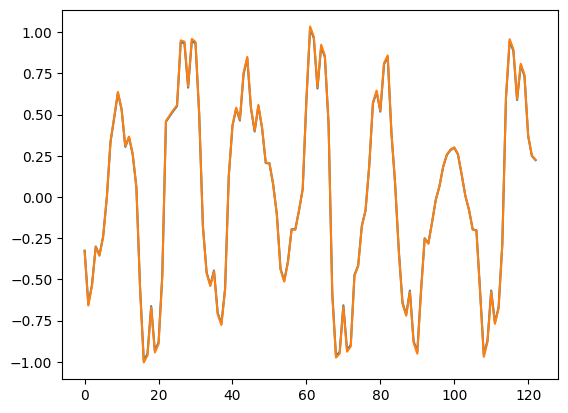

In [29]:
# Plot comparison
plt.plot(orbit_d.get()[:,1]*1e3)
plt.plot(orbit_l.get()[:,1]*1e-6)

In [30]:

# get the AT ring
ring = sr.design.get_lattice()

# Get AT element for a given BPM
#bpm = sr.design.get_bpm("BPMZ4D1R")
#elt = bpm.positions._RBpmArray__element
#print(elt)

# Get AT element for a given steerer
#steer = sr.design.get_magnet("VS3M2T6R")
#elt = steer.strength._RWStrengthScalar__elements[0]
#print(elt)

In [31]:
ring["S3M2D1R"]


Lattice([Sextupole('S3M2D1R', 0.16, -21.185, Corrector='V', KickAngle=array([0., 0.]), PolynomA=array([0.000625, 0.      , 0.      ]))], name='BESSY II', energy=1718500000.0, particle=Particle('relativistic'), periodicity=1, harmonic_number=400, beam_current=np.float64(0.0), nbunch=np.int64(1))

In [24]:
ring["S4M2D1R"]

Lattice([Sextupole('S4M2D1R', 0.16, 16.68, Corrector='H', KickAngle=array([0., 0.]), PolynomB=array([-6.250e-04,  0.000e+00,  1.668e+01]))], name='BESSY II', energy=1718500000.0, particle=Particle('relativistic'), periodicity=1, harmonic_number=400, beam_current=np.float64(0.0), nbunch=np.int64(1))

In [41]:
import at
elements = ring[at.checkattr('Corrector', attrvalue='H')]

for elem in elements:
    print(elem.PolynomA)
    #print(elem.KickAngle)

[0. 0. 0.]
[0. 0.]
[0. 0. 0.]
[0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0.]
[0. 0. 0.]
[0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0.]
[0. 0. 0.]
[0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0.]
[0. 0. 0.]
[0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0.]
[0. 0. 0.]
[0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0.]
[0. 0. 0.]
[0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0.]
[0. 0. 0.]
[0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0.]
[0. 0. 0.]
[0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0.]
[0. 0. 0.]
[0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0.]
[0. 0. 0.]
[0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0.]
[0. 0. 0.]
[0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0.]
[0. 0. 0.]
[0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0.]
[0. 0. 0.]
[0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0.]
[0. 0. 0.]
[0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0.]
[0. 0. 0.]
[0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0.]
[0. 0. 0.]
[0. 0.]
[0. 0. 0.]


In [9]:
# Get the devices
hcorr = sr.live.get_magnets("HCorr")
vcorr = sr.live.get_magnets("VCorr")
orbit = sr.live.get_bpms("BPM").positions

# Create an initial orbit with errors
std_kick = 100e-6
corr = sr.live.get_magnet("VS3M2D1R")
corr.strength.set(std_kick)
#hcorr.strengths.set(std_kick)
#hcorr.strengths.set(std_kick * np.random.normal(size=len(hcorr)))
#vcorr.strengths.set(std_kick * np.random.normal(size=len(vcorr)))
time.sleep(3)

print(vcorr.strengths.get())


#orbit_initial = orbit.get()
#print(orbit_initial)

[0.0001 0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.    ]


In [10]:
# Get the devices
hcorr_d = sr.design.get_magnets("HCorr")
vcorr_d = sr.design.get_magnets("VCorr")
orbit_d = sr.design.get_bpms("BPM").positions

# Create an initial orbit with errors
std_kick = 100e-6
corr_d = sr.design.get_magnet("VS3M2D1R")
corr_d.strength.set(std_kick)
#hcorr.strengths.set(std_kick)
#hcorr.strengths.set(std_kick * np.random.normal(size=len(hcorr)))
#vcorr.strengths.set(std_kick * np.random.normal(size=len(vcorr)))
time.sleep(3)

print(vcorr_d.strengths.get())


#orbit_initial = orbit.get()
#print(orbit_initial)

[0.0001 0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.    ]


In [11]:
print(vcorr.strengths.get())

[0.0001 0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.    ]


[[ 1.65776421e+04 -3.29277182e+05]
 [ 1.14783316e+04 -6.58563827e+05]
 [ 7.49089817e+03 -5.36161825e+05]
 [ 9.21487725e+03 -3.03525308e+05]
 [ 4.11466188e+03 -3.56953722e+05]
 [-1.53967578e+03 -2.42608835e+05]
 [ 1.07766612e+03 -4.44624244e+03]
 [ 8.69857692e+03  3.36731888e+05]
 [ 1.20123184e+04  4.85083728e+05]
 [ 1.13642223e+04  6.37629044e+05]
 [-3.91707340e+03  5.35212285e+05]
 [-6.21057992e+03  3.07125577e+05]
 [-3.33147658e+03  3.66247747e+05]
 [ 1.32745896e+04  2.61593627e+05]
 [ 2.24719436e+04  5.85778342e+04]
 [ 1.86012890e+04 -5.58502662e+05]
 [ 1.02869400e+04 -1.00434189e+06]
 [-1.28587069e+04 -9.62103668e+05]
 [-1.96933300e+04 -6.69440017e+05]
 [-9.94795398e+03 -9.43225399e+05]
 [ 2.06995210e+04 -8.93036312e+05]
 [ 1.85725518e+04 -4.85220644e+05]
 [-1.11676377e+04  4.61542293e+05]
 [-1.22077469e+04  4.94653610e+05]
 [-1.32478561e+04  5.27764928e+05]
 [-1.41700863e+04  5.57123629e+05]
 [-1.60283541e+04  9.50424642e+05]
 [ 1.00422635e+04  9.42736975e+05]
 [ 1.84686920e+04  6

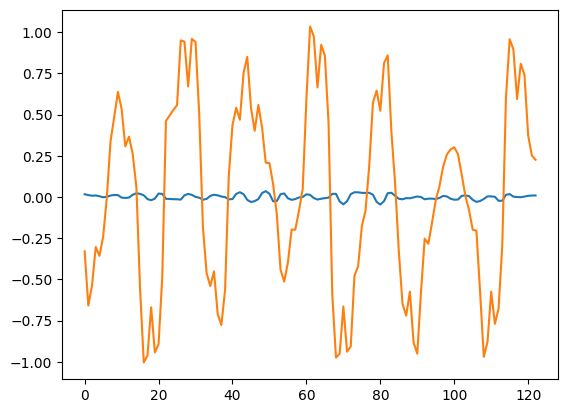

In [12]:

orbit_initial = orbit.get()
print(orbit_initial)

plt.plot(orbit_initial*1e-6)

In [ ]:
plot(orbit.get()[:,1])

NameError: name 'plot' is not defined

CA.Client.Exception...............................................
    Context: "nb-56j0b44.basisit.de:5064"
    Source File: modules/ca/src/client/cac.cpp line 1238
    Current Time: Tue Jan 27 2026 16:57:55.905285510
..................................................................


In [ ]:
# Compare to MML

mml_values = np.array([
  -0.548395086903857,
  -1.012630432646402,
  -0.862897505672887,
  -0.522995524471487,
  -0.658189856521371,
  -0.516173101625783,
  -0.133057027821788,
   0.392126054914456,
   0.563934272606167,
   0.740274085202912,
   0.620698379527692,
   0.355609275038271,
   0.423333396468476,
   0.301220987985241,
   0.066145853113093,
  -0.651251097949268,
  -1.170560020657783,
  -1.120870632419439,
  -0.779628042974558,
  -1.098108137417404,
  -1.039280007232975,
  -0.564055382358618,
   0.538526284971412,
   0.577087080051735,
   0.615647875132058,
   0.649838446769944,
   1.107595363627166,
   1.098222848289203,
   0.780522962096338,
   1.116307896849065,
   1.095279850154315,
   0.584401801876353,
  -0.212660175271086,
  -0.542094629513108,
  -0.632844890961403,
  -0.527361773381497,
  -0.831735165388016,
  -0.906921111725548,
  -0.656288869430261,
   0.152637608565171,
   0.510107802114268,
   0.634095433537279,
   0.547794913320217,
   0.880254059263082,
   0.992704581728260,
   0.634065043149221,
   0.466416157613840,
   0.647773785871704,
   0.489669647202759,
   0.240171949704727,
   0.236207591023490,
   0.087170336604686,
  -0.125032463676224,
  -0.512234534072165,
  -0.595737451399580,
  -0.459325090830385,
  -0.227936257211556,
  -0.227839435382618,
  -0.092195396495755,
   0.058374234146639,
   0.690818147727373,
   1.205830275263787,
   1.134748178819593,
   0.774249133536717,
   1.075344527114256,
   0.997510204603194,
   0.517264575129486,
  -0.689094833374326,
  -1.135883617362593,
  -1.107761758717994,
  -0.773840868709177,
  -1.092921802241169,
  -1.055434449386964,
  -0.556094229916365,
  -0.488750222978695,
  -0.205031956664856,
  -0.094293028012348,
   0.223157437268723,
   0.670960218378011,
   0.754507772466096,
   0.611363709323305,
   0.949153074191396,
   1.002567634614958,
   0.459717119030237,
   0.093438467057282,
  -0.385082846682778,
  -0.756736774143839,
  -0.841579773055778,
  -0.670533979887471,
  -1.030994728204280,
  -1.108871586555440,
  -0.674176224876900,
  -0.292569481789967,
  -0.326424012263231,
  -0.176245513853861,
  -0.018289777369182,
   0.080420482968790,
   0.218206834561504,
   0.302341005180173,
   0.267295068412974,
   0.177434401470334,
  -0.001920387408844,
  -0.151210006643998,
  -0.219977657081387,
  -0.426651371994250,
  -0.568250084439999,
  -0.424347192298211,
  -0.651182683604045,
  -1.035004865223722,
  -0.897905345744703,
  -0.552553098168575,
  -0.705228145938345,
  -0.569045105220304,
  -0.175959630086212,
   0.699461083747587,
   1.024675280579722,
   0.918681075556277,
   0.576846841787854,
   0.749151978895954,
   0.637694866837515,
   0.278751432881705,
   0.135521946298300,
   0.104948249372505,

])

print(np.size(orbit_initial[:,1]))

plt.plot(orbit_initial[:,1]*1e-6,label='Twin')
plt.plot(mml_values,label='MML')
plt.legend()
plt.xlabel('BPM number')
plt.ylabel('Vertical orbit')

In [ ]:
# Correct the orbit
# If you are using the ORM measured on design to correct on live you need to set the gain
# since the unit for the BPMs are not the same for both modes yet.

sr.live.orbit.correct(gain=1e-9)
#sr.design.orbit.correct()
#sr.live.orbit.correct()

time.sleep(3)
orbit_after = orbit.get()

##### Plot the results

In [ ]:
# Remember: if you change the example from live to design you need to change the unit for the orbit when plotting since not the same yet.

fig = plt.figure()
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
ax1.plot(orbit_initial[:, 0]*1e-6, label="Orbit before correction")
ax2.plot(orbit_initial[:, 1]*1e-6, label="Orbit before correction")
ax1.plot(orbit_after[:, 0]*1e-6, label="Orbit after correction")
ax2.plot(orbit_after[:, 1]*1e-6, label="Orbit after correction")

#ax3.plot(hcorr.strengths.get(), label="H Steerers")
#ax3.plot(vcorr.strengths.get(), label="V Steerers")

ax1.set_ylabel("Horizontal pos. [mm]")
ax2.set_ylabel("Vertical pos. [mm]")
ax2.set_xlabel("BPM number")
ax3.set_ylabel("Strength (rad)")
ax3.set_xlabel("Steerer number")
ax1.legend()
ax2.legend()
ax3.legend()
fig.tight_layout()

plt.show()